## AdaBoost
### AdaBoost is a boosting algorithm which combines multiple weak classifiers to create a strong classifier. In this notebook, we will use AdaBoost to classify the quality of apples based on their features. Comparing this algorithm to other classification algorithms.

## Reading the dataset

In [83]:

import pandas as pd


data=pd.read_csv("./apple_quality.csv")

data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [84]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [85]:
#Checking for missing values

data.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [86]:
#Encode target variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Quality']=le.fit_transform(data['Quality'])
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


## Preprocess
### We will need to separate the features and the target variable. For this dataset more preprocessing is not required as all data is numericall, there are no missing values and the target variable is already encoded. We will remove the column A_id as it is does not provide any useful information.

In [87]:
#Remove the A_id column
data.drop('A_id',axis=1,inplace=True)

#Separate the features and target variable
X=data.drop('Quality',axis=1)
y=data['Quality']

#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## AdaBoost 
### We will use the AdaBoostClassifier from the sklearn library to classify the quality of apples. We will use the default parameters for now.

In [88]:
#Use AdaBoost with the default parameters

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score,accuracy_score

ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)

print("F1 Score: ",f1_score(y_test,y_pred))
print("Accuracy: ",accuracy_score(y_test,y_pred))

F1 Score:  0.7727272727272727
Accuracy:  0.775


C:\Users\alvar\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Comparison with other default classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

rf=RandomForestClassifier()
svc=SVC()

rf.fit(X_train,y_train)
svc.fit(X_train,y_train)

y_pred_rf=rf.predict(X_test)
y_pred_svc=svc.predict(X_test)

print("Random Forest")
print("F1 Score: ",f1_score(y_test,y_pred_rf))

print("SVC")
print("F1 Score: ",f1_score(y_test,y_pred_svc))



Random Forest
F1 Score:  0.9025
SVC
F1 Score:  0.9077306733167082


### As we can see with default parameters AdaBoost performs worse than Random Forest and SVC. We can try to tune the parameters to improve the performance of AdaBoost. Therefore, we will now try to tune the parameters of AdaBoost to improve its performance.




## Hyperparameter tuning
### Some of the parameters we can tune are:
- n_estimators: The number of weak learners to train iteratively.
- learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.
- estimator: The base estimator from which the boosted ensemble is built. The default is a decision tree initialized with max_depth=1.
- algorithm: The algorithm to use for the optimization. The posible values are 'SAMME' and 'SAMME.R', the difference is that 'SAMME.R' uses the predicted probabilities to update the additive model, while 'SAMME' uses the predicted class labels.
- random_state: The seed used by the random number generator.

### Something to take into consideration is the weak learner. By default, AdaBoost uses a decision tree with max_depth=1. We can try to use a different weak learner to see if it improves the performance of AdaBoost. All this parameters will be tuned using GridSearchCV.

In [90]:
#Now we will perform a grid search and we will store the acc and f1 score for each parameter combination to plot them later

from sklearn.model_selection import GridSearchCV

#Define the weak learners
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Define the weak learners
# Define the weak learners
dt = DecisionTreeClassifier(max_depth=3)
svc = SVC(probability=True, kernel='linear')
rf = RandomForestClassifier(n_estimators=1)
nb=GaussianNB()

# Define the parameters to tune for AdaBoost
param_grid_ada = {
    'n_estimators': [10,50,100,500],
    'learning_rate': [ 0.1,0.2,0.3,1],
    'estimator': [dt, rf],
    'algorithm': [ 'SAMME'],
    'random_state': [42]
}



# Use GridSearchCV to tune the parameters for AdaBoost
ada = AdaBoostClassifier()
grid_search_ada = GridSearchCV(ada, param_grid_ada, cv=5, scoring='f1')
grid_search_ada.fit(X_train, y_train)
print("AdaBoost completed") 
# Store results for AdaBoost
ada_best_params = grid_search_ada.best_params_
ada_best_score = grid_search_ada.best_score_

# Define the parameters to tune for Random Forest
param_grid_rf = {
    'n_estimators': [2,10,15,20,100,200],
    'max_depth': [2, 3, 4, 5,10, None],
    'random_state': [42]
}

# Use GridSearchCV to tune the parameters for Random Forest
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1')
grid_search_rf.fit(X_train, y_train)

# Store results for Random Forest
rf_best_params = grid_search_rf.best_params_
rf_best_score = grid_search_rf.best_score_

# Define the parameters to tune for Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-6, 1e-5]
}

# Use GridSearchCV to tune the parameters for Naive Bayes
nb = GaussianNB()
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring='f1')
grid_search_nb.fit(X_train, y_train)


nb_best_params = grid_search_nb.best_params_
nb_best_score = grid_search_nb.best_score_


summary_table = pd.DataFrame({
    'Algorithm': ['AdaBoost', 'Random Forest', 'Naive Bayes'],
    'Best Parameters': [ada_best_params, rf_best_params, nb_best_params],
    'Best F1 Score': [ada_best_score, rf_best_score, nb_best_score]
})

print("Model Comparison Summary")
# Set display options
pd.set_option('display.max_colwidth', None)  # Show full content in columns
pd.set_option('display.max_columns', None)   # Show all columns

# Display the DataFrame
print(summary_table)

AdaBoost completed
Model Comparison Summary
       Algorithm  \
0       AdaBoost   
1  Random Forest   
2    Naive Bayes   

                                                                                                                              Best Parameters  \
0  {'algorithm': 'SAMME', 'estimator': RandomForestClassifier(n_estimators=1), 'learning_rate': 0.2, 'n_estimators': 500, 'random_state': 42}   
1                                                                                {'max_depth': None, 'n_estimators': 100, 'random_state': 42}   
2                                                                                                                    {'var_smoothing': 1e-09}   

   Best F1 Score  
0       0.888471  
1       0.877598  
2       0.745947  


### As the previous dataset was too simple, a random forest classifier performed better than AdaBoost, the best AdaBoost hyperparameters was using 1 estimator with random forest. We will now use a more complex dataset to see if AdaBoost performs better than Random Forest and Naive Bayes. This dataset deals with a classification problem, where we will classify whether a client will subscribe to a term deposit or not. The dataset is the bank marketing dataset.


# Bank marketing dataset
## This dataset contains the following features:
   ### bank client data:
   - age (numeric)
   - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   - education (categorical: "unknown","secondary","primary","tertiary")
   - default: has credit in default? (binary: "yes","no")
   - balance: average yearly balance, in euros (numeric) 
   - housing: has housing loan? (binary: "yes","no")
   - loan: has personal loan? (binary: "yes","no")
   #### related with the last contact of the current campaign:
   - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   - day: last contact day of the month (numeric)
   - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   - duration: last contact duration, in seconds (numeric)
   ### other attributes:
   - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
   - previous: number of contacts performed before this campaign and for this client (numeric)
   - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
  
## We will now read the dataset and preprocessthe features needed for the classification task.


In [91]:
import pandas as pd
#Read the dataset
data=pd.read_csv("./bank-full.csv", sep=";")

data.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [93]:
#check for missing values

data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### We can see there are no missing values in the dataset and that many of the features are categorical. We will need to encode these features to be able to use them in the classification task. We will also encode the target variable.

In [94]:
#Encode categorical features


#get all object features one hot encoding to the columns "job", "marital" and "contact". Perform label encoding for the rest of the object features
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#One hot encoding
ohe=OneHotEncoder()
job_marital_contact=ohe.fit_transform(data[['job','marital','contact']]).toarray()
job_marital_contact=pd.DataFrame(job_marital_contact,columns=ohe.get_feature_names_out(['job', 'marital', 'contact']))

#Label encoding
le=LabelEncoder()
data['education']=le.fit_transform(data['education'])
data['default']=le.fit_transform(data['default'])
data['housing']=le.fit_transform(data['housing'])
data['loan']=le.fit_transform(data['loan'])



#Concatenate the one hot encoded features with the label encoded features
data=pd.concat([data,job_marital_contact],axis=1)

#Drop the original columns
data.drop(['job','marital','contact'],axis=1,inplace=True)

#Encode the target variable
data['y']=le.fit_transform(data['y'])

#drop the column poutcome as this is the predictions (all are unknown)
data.drop('poutcome',axis=1,inplace=True)

#Month to numerical
data['month']=le.fit_transform(data['month'])

#Standarize balance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data['balance']=scaler.fit_transform(data[['balance']])

data.head()


,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,58,2,0,0.256419,1,0,5,8,261,1,-1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44,1,0,-0.437895,1,0,5,8,151,1,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,33,1,0,-0.446762,1,1,5,8,76,1,-1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,47,3,0,0.047205,1,0,5,8,92,1,-1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,33,3,0,-0.447091,0,0,5,8,198,1,-1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


### With the preprocessing done, we will now separate the features and the target variable. We will also split the data into training and testing sets.

In [95]:
# Now that we have done the preprocessing, we will separate the features and the target variable. We will also split the data into training and testing sets.

X=data.drop('y',axis=1)
y=data['y']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



In [96]:
# Now we will perform a simple comparison between base random forest, naive bayes and adaboost classifiers
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


rf=RandomForestClassifier()
nb=GaussianNB()
ada=AdaBoostClassifier()

rf.fit(X_train,y_train)
nb.fit(X_train,y_train)
ada.fit(X_train,y_train)

y_pred_rf=rf.predict(X_test)
y_pred_nb=nb.predict(X_test)
y_pred_ada=ada.predict(X_test)

#compare f1-score and accuracy
print("Random Forest")
print("F1 Score: ",f1_score(y_test,y_pred_rf))
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))

print("Naive Bayes")
print("F1 Score: ",f1_score(y_test,y_pred_nb))
print("Accuracy: ",accuracy_score(y_test,y_pred_nb))

print("AdaBoost")
print("F1 Score: ",f1_score(y_test,y_pred_ada))
print("Accuracy: ",accuracy_score(y_test,y_pred_ada))

C:\Users\alvar\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Random Forest
F1 Score:  0.4713302752293578
Accuracy:  0.8980426849496849
Naive Bayes
F1 Score:  0.4113785557986871
Accuracy:  0.8215194072763463
AdaBoost
F1 Score:  0.42473745624270715
Accuracy:  0.8909653875926131


### We can see that Random Forest performs better than AdaBoost and Naive Bayes with base params. We will now tune the hyperparameters of AdaBoost to see if we can improve its performance.

In [97]:
import pandas as pd
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Define weak learners
dt = DecisionTreeClassifier(max_depth=3)
dt2 = DecisionTreeClassifier(max_depth=2)
dt3 = DecisionTreeClassifier(max_depth=4)

svc = SVC(probability=True, kernel='linear')
rf = RandomForestClassifier(n_estimators=1, max_depth=1)
rf2 = RandomForestClassifier(n_estimators=2, max_depth=2)
rf3 = RandomForestClassifier(n_estimators=4, max_depth=4)
nb = GaussianNB()

# Define the parameter grid for AdaBoost
param_grid_ada = {
    'n_estimators': [250, 500, 1000],
    'learning_rate': [0.05, 0.1, 0.5, 1.0],
    'estimator': [dt, dt2, dt3, rf, rf2, rf3, nb],
    'algorithm': ['SAMME'],
    'random_state': [42]
}

# Timing and grid search for AdaBoost
start_time = time.time()
ada = AdaBoostClassifier()
grid_search_ada = GridSearchCV(ada, param_grid_ada, cv=5, scoring='f1', verbose=3)
grid_search_ada.fit(X_train, y_train)
end_time = time.time()
ada_time_grid = end_time - start_time
print("AdaBoost completed")

# Store results for AdaBoost
ada_best_params = grid_search_ada.best_params_
ada_best_score = grid_search_ada.best_score_

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [2, 10, 15, 20, 100, 200],
    'max_depth': [2, 3, 4, 5, 10, None],
    'random_state': [42]
}

# Timing and grid search for Random Forest
start_time = time.time()
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1')
grid_search_rf.fit(X_train, y_train)
end_time = time.time()
rf_time_grid = end_time - start_time

# Store results for Random Forest
rf_best_params = grid_search_rf.best_params_
rf_best_score = grid_search_rf.best_score_

# Define the parameter grid for Naive Bayes
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-6, 1e-5]
}

# Timing and grid search for Naive Bayes
start_time = time.time()
nb = GaussianNB()
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring='f1')
grid_search_nb.fit(X_train, y_train)
end_time = time.time()
nb_time_grid = end_time - start_time

# Store results for Naive Bayes
nb_best_params = grid_search_nb.best_params_
nb_best_score = grid_search_nb.best_score_

# Create a summary table including the time taken
summary_table = pd.DataFrame({
    'Algorithm': ['AdaBoost', 'Random Forest', 'Naive Bayes'],
    'Best Parameters': [ada_best_params, rf_best_params, nb_best_params],
    'Best F1 Score': [ada_best_score, rf_best_score, nb_best_score],
    'Grid Search Time (seconds)': [ada_time_grid, rf_time_grid, nb_time_grid]
})

print("Model Comparison Summary")
# Display the summary table
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

print(summary_table)


Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.05, n_estimators=250, random_state=42;, score=0.301 total time=   6.8s
[CV 2/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.05, n_estimators=250, random_state=42;, score=0.335 total time=   6.8s
[CV 3/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.05, n_estimators=250, random_state=42;, score=0.357 total time=   6.8s
[CV 4/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.05, n_estimators=250, random_state=42;, score=0.363 total time=   6.8s
[CV 5/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.05, n_estimators=250, random_state=42;, score=0.365 total time=   6.8s
[CV 1/5] END algorithm=SAMME, estimator=DecisionTreeClassifier(max_depth=3), learning_rate=0.05, n_estimators=500, ran

###  Now we will plot the f1 score and accuracy and the ROC curves of the best models

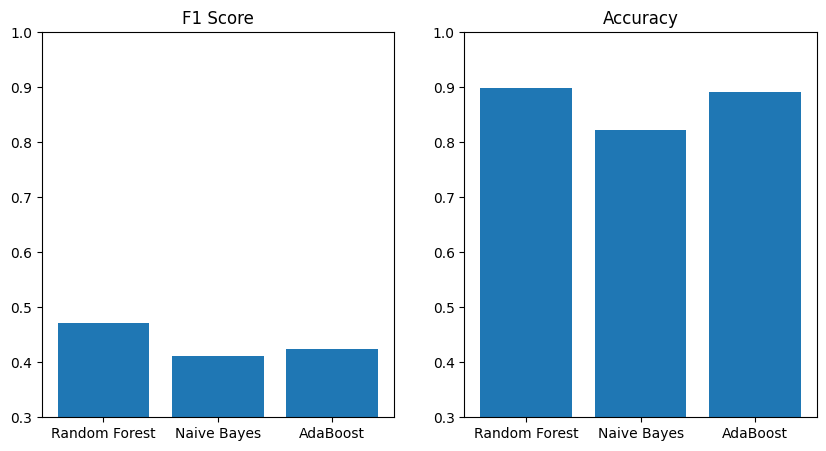

In [98]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

#Plot the f1 score and accuracy
f1_scores=[f1_score(y_test,y_pred_rf),f1_score(y_test,y_pred_nb),f1_score(y_test,y_pred_ada)]
accuracies=[accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_nb),accuracy_score(y_test,y_pred_ada)]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(['Random Forest','Naive Bayes','AdaBoost'],f1_scores)
plt.ylim(0.3, 1) 
plt.title("F1 Score")
plt.subplot(1,2,2)
plt.bar(['Random Forest','Naive Bayes','AdaBoost'],accuracies)
plt.ylim(0.3, 1) 
plt.title("Accuracy")
plt.show()



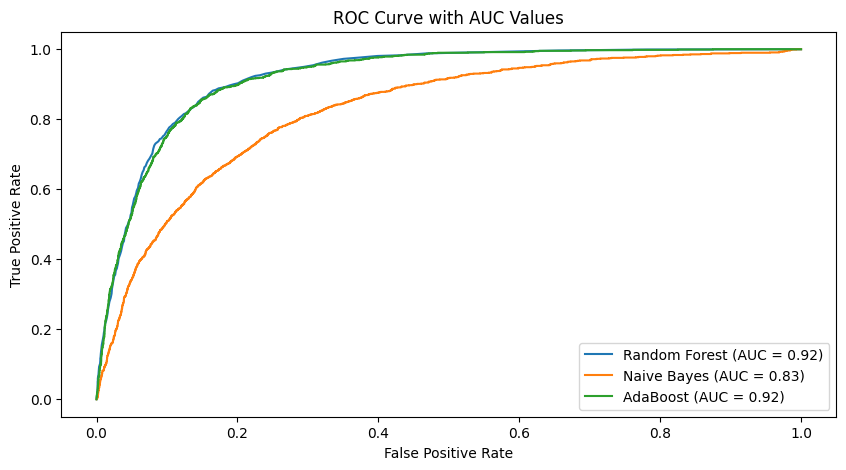

In [99]:
#Plot the ROC curves
# Retrieve the best models from each grid search
best_rf = grid_search_rf.best_estimator_
best_nb = grid_search_nb.best_estimator_
best_ada = grid_search_ada.best_estimator_

# Predict probabilities for the test set
y_pred_rf = best_rf.predict_proba(X_test)
y_pred_nb = best_nb.predict_proba(X_test)
y_pred_ada = best_ada.predict_proba(X_test)

# Compute ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf[:, 1])
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb[:, 1])
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_ada[:, 1])

# Compute AUC scores
auc_rf = roc_auc_score(y_test, y_pred_rf[:, 1])
auc_nb = roc_auc_score(y_test, y_pred_nb[:, 1])
auc_ada = roc_auc_score(y_test, y_pred_ada[:, 1])

# Plot the ROC curves with AUC values
plt.figure(figsize=(10, 5))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})")
plt.plot(fpr_ada, tpr_ada, label=f"AdaBoost (AUC = {auc_ada:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with AUC Values")
plt.legend()
plt.show()


### Now we will plot the time needed to train the models comparing AdaBoost with the best hyperparameters and Random Forest, Naive Bayes and svc.

Text(0.5, 1.0, 'Training time')

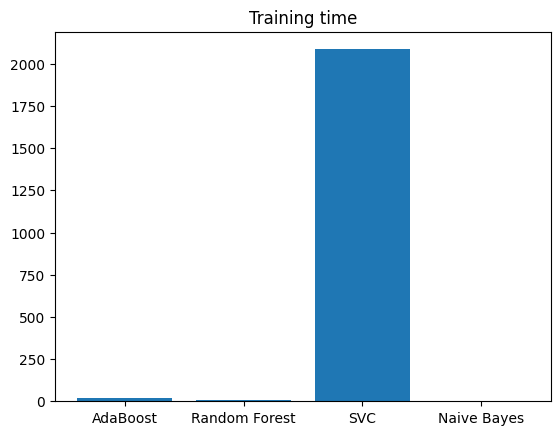

In [100]:
import time

#Train the models with the best hyperparameters
ada=AdaBoostClassifier(**ada_best_params)
rf=RandomForestClassifier(**rf_best_params)
svc=SVC(probability=True, kernel='linear')
nv=GaussianNB(**nb_best_params)
#Train svc



start=time.time()
ada.fit(X_train,y_train)
end=time.time()
ada_time=end-start

start=time.time()
rf.fit(X_train,y_train)
end=time.time()
rf_time=end-start

start=time.time()
svc.fit(X_train,y_train)
end=time.time()
svc_time=end-start

start=time.time()
nv.fit(X_train,y_train)
end=time.time()
nv_time=end-start

times=[ada_time,rf_time,svc_time,nv_time]

plt.bar(['AdaBoost','Random Forest','SVC','Naive Bayes'],times)
plt.title("Training time")


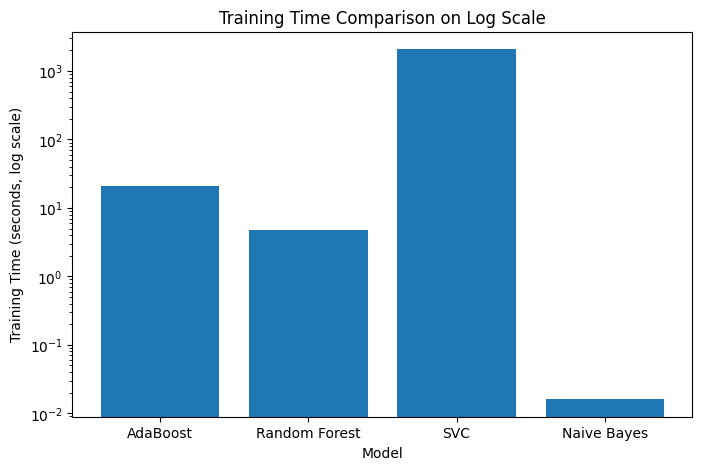

In [101]:
# Store training times in a list
times = [ada_time, rf_time, svc_time, nv_time]

# Plot training times on a log scale
plt.figure(figsize=(8, 5))
plt.bar(['AdaBoost', 'Random Forest', 'SVC', 'Naive Bayes'], times)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel("Model")
plt.ylabel("Training Time (seconds, log scale)")
plt.title("Training Time Comparison on Log Scale")
plt.show()